<a href="https://colab.research.google.com/github/Eminent01/Text-Classification-using-Fully-connected-FC-NN/blob/main/text_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!unzip "/content/drive/MyDrive/Text_classification_FCN/archive.zip" -d "/content/drive/MyDrive/Text_classification_FCN"

Archive:  /content/drive/MyDrive/Text_classification_FCN/archive.zip
  inflating: /content/drive/MyDrive/Text_classification_FCN/reviews.csv  


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Text_classification_FCN/reviews.csv")

In [ ]:
data.shape

(12495, 12)

In [ ]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [ ]:
data = data[['content', 'score']]

In [ ]:
data.tail()

,content,score
12490,"I really like the planner, it helps me achieve...",5
12491,😁****😁,5
12492,Very useful apps. You must try it,5
12493,Would pay for this if there were even more add...,5
12494,Sooow good,5


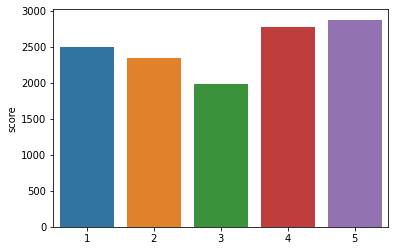

In [ ]:
sns.barplot(x= data.score.value_counts().index,y= data.score.value_counts())

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
!pip install twython

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [ ]:
def analyze_sentiment(data):
    analysis = SIA().polarity_scores(data)
    if analysis['compound'] > 0:    # Converting rating 3 with positive sentiment as group 1
        return 'Positive'
    elif analysis['compound'] == 0: # Converting rating 3 with neutral sentiment as group to drop
        return 'Neutral'
    else:                           # Converting rating 3 with negative sentiment as group 0
        return 'Negative'

In [ ]:
%timeit
data['sentiment_neutral_ratings'] = data.loc[data.score == 3].content.apply(analyze_sentiment)

In [ ]:
data[data.score == 3].head()

,content,score,sentiment_neutral_ratings
400,"This still works pretty well, but I'm not a fa...",3,Positive
401,Good app. Annoying pop up every morning on my ...,3,Positive
402,I haven't used they made an effort from there ...,3,Negative
403,"29.9. Nothing new, I've already reconciled to ...",3,Positive
404,I've been a satisfied user of Any.do since Mar...,3,Positive


In [ ]:
data.loc[data.sentiment_neutral_ratings == 'Neutral'].head()

,content,score,sentiment_neutral_ratings
426,Too many options and gets too fancy for an app...,3,Neutral
429,Way too expensive; if there was a monthly opti...,3,Neutral
438,Hyyy,3,Neutral
441,Don't know,3,Neutral
445,We need a monthly payment terms. Currently it ...,3,Neutral


In [ ]:
data = data[data.sentiment_neutral_ratings != 'Neutral']

In [ ]:
def rating_seg(df):
  score_ = 0
  if df['score'] <= 2:
    score_ = 0
  elif df['score'] == 3:
    if df['sentiment_neutral_ratings'] == 'Positive':
      score_ = 0
    else:
      score_ = 1
  else:
    score_ = 1
  return score_

In [ ]:
data['new_score'] = data.apply(rating_seg, axis=1)
data[['score','new_score']].sample(frac=1.0).tail() # verifying data

,score,new_score
1101,1,0
10990,2,0
6532,4,1
8582,5,1
934,5,1


In [ ]:
data.drop(['sentiment_neutral_ratings'],inplace=True,axis=1)

In [ ]:
data.tail()

,content,score,new_score
12490,"I really like the planner, it helps me achieve...",5,1
12491,😁****😁,5,1
12492,Very useful apps. You must try it,5,1
12493,Would pay for this if there were even more add...,5,1
12494,Sooow good,5,1


In [ ]:
data.shape

(12207, 3)

In [ ]:
new_reviews = data.to_csv('/content/drive/MyDrive/Text_classification_FCN/new_reviews.csv')